In [1]:
import numpy as np
from matplotlib import pyplot as plt
import json
from pymongo import MongoClient
client = MongoClient()
db = client['gtr']

In [2]:
repo_targets = {}
for doc in db['repo_core_targets'].find():
    if doc['target_teams']:
        repo_targets[doc['repo']] = doc['target_teams']

In [3]:
def NDCG(repo,rec,repo_targets):
    dcg = 0
    for i,tm in enumerate(rec):
        if tm in repo_targets[repo]:
            dcg += 1/np.log2(i+2)
    target_cnt = 0
    idcg =  0
    for tm in repo_targets[repo]:
        target_cnt += 1
        idcg += 1/np.log2(target_cnt+1)
    dcg /= idcg
    return dcg

In [4]:
recommendations = {}
with open('sae_team_score_contri.json') as rj:
    for l in rj.readlines():
        line = l.strip().split('\t')
        repo = line[0]
        if not repo in repo_targets:
            continue
        recs = [json.loads(r)[0] for r in line[1:]]
        recommendations[repo] = recs

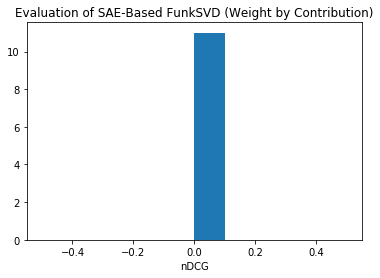

0.0 0.0


In [5]:
NDCGs = []
for repo in recommendations:
    NDCGs.append(NDCG(repo,recommendations[repo],repo_targets))
plt.hist(NDCGs)
plt.xlabel("nDCG")
plt.title("Evaluation of SAE-Based FunkSVD (Weight by Contribution)")
plt.savefig('evaluate_interest_mean.jpg',bbox='tight')
plt.show()
print(min(NDCGs),max(NDCGs))

In [6]:
recommendations = {}
with open('sae_team_score_degree.json') as rj:
    for l in rj.readlines():
        line = l.strip().split('\t')
        repo = line[0]
        if not repo in repo_targets:
            continue
        recs = [json.loads(r)[0] for r in line[1:]]
        recommendations[repo] = recs

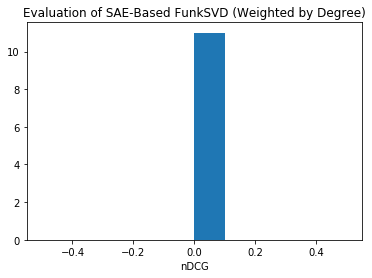

0.0 0.0


In [7]:
NDCGs = []
for repo in recommendations:
    NDCGs.append(NDCG(repo,recommendations[repo],repo_targets))
plt.hist(NDCGs)
plt.xlabel("nDCG")
plt.title("Evaluation of SAE-Based FunkSVD (Weighted by Degree)")
plt.savefig('evaluate_interest_contri.jpg',bbox='tight')
plt.show()
print(min(NDCGs),max(NDCGs))

In [8]:
recommendations = {}
with open('sae_team_score_min.json') as rj:
    for l in rj.readlines():
        line = l.strip().split('\t')
        repo = line[0]
        if not repo in repo_targets:
            continue
        recs = [json.loads(r)[0] for r in line[1:]]
        recommendations[repo] = recs

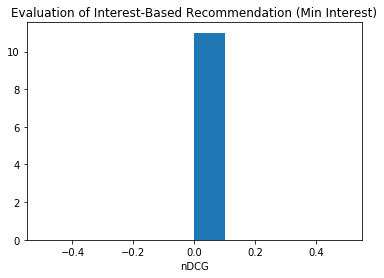

0.0 0.0


In [9]:
NDCGs = []
for repo in recommendations:
    NDCGs.append(NDCG(repo,recommendations[repo],repo_targets))
plt.hist(NDCGs)
plt.xlabel("nDCG")
plt.title("Evaluation of Interest-Based Recommendation (Min Interest)")
plt.savefig('evaluate_interest_degree.jpg',bbox='tight')
plt.show()
print(min(NDCGs),max(NDCGs))

In [10]:
recommendations = {}
with open('sae_team_score_max.json') as rj:
    for l in rj.readlines():
        line = l.strip().split('\t')
        repo = line[0]
        if not repo in repo_targets:
            continue
        recs = [json.loads(r)[0] for r in line[1:]]
        recommendations[repo] = recs

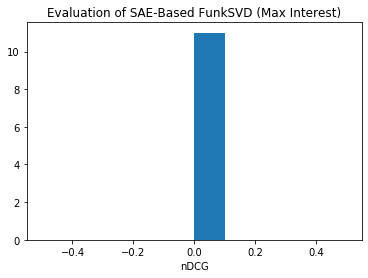

0.0 0.0


In [11]:
NDCGs = []
for repo in recommendations:
    NDCGs.append(NDCG(repo,recommendations[repo],repo_targets))
plt.hist(NDCGs)
plt.xlabel("nDCG")
plt.title("Evaluation of SAE-Based FunkSVD (Max Interest)")
plt.savefig('evaluate_interest_degree.jpg',bbox='tight')
plt.show()
print(min(NDCGs),max(NDCGs))

In [12]:
recommendations = {}
with open('sae_team_score_mean.json') as rj:
    for l in rj.readlines():
        line = l.strip().split('\t')
        repo = line[0]
        if not repo in repo_targets:
            continue
        recs = [json.loads(r)[0] for r in line[1:]]
        recommendations[repo] = recs

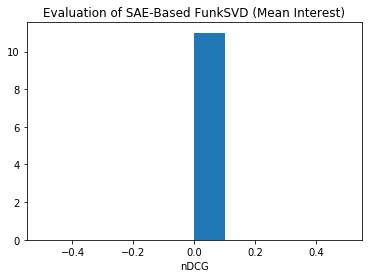

0.0 0.0


In [13]:
NDCGs = []
for repo in recommendations:
    NDCGs.append(NDCG(repo,recommendations[repo],repo_targets))
plt.hist(NDCGs)
plt.xlabel("nDCG")
plt.title("Evaluation of SAE-Based FunkSVD (Mean Interest)")
plt.savefig('evaluate_interest_degree.jpg',bbox='tight')
plt.show()
print(min(NDCGs),max(NDCGs))